In [109]:
%matplotlib inline

import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('../fair_regression/save_temporary_results.csv')
del df['Unnamed: 0']

In [111]:
# I forgot to include a place for the value of the penalty weight, so get it from ID string now
import re

def get_penalty(s):
    my_re = re.match('.*pen:\s(\d.*)\stype.*', s)
    val = float(my_re.group(1))
    return val

if 'l_fair' not in df:
    df['l_fair'] = df['ID_String'].apply(get_penalty)
ID_strings = df['ID_String']

num_cols = ['Group Penalty', 'Individual Penalty', 'MSE', 'Score', 'l_fair']
df[num_cols] = df[num_cols].apply(pd.to_numeric)

In [112]:
mean_df = df.groupby(['Type', 'l_fair'], as_index=False).agg({'Individual Penalty': np.mean,
                                                              'Group Penalty': np.mean,
                                                              'MSE': np.mean,
                                                              'Score': np.mean})
std_df = df.groupby(['Type', 'l_fair'], as_index=False).agg({'Individual Penalty': np.std,
                                                             'Group Penalty': np.std,
                                                             'MSE': np.std,
                                                             'Score': np.std})

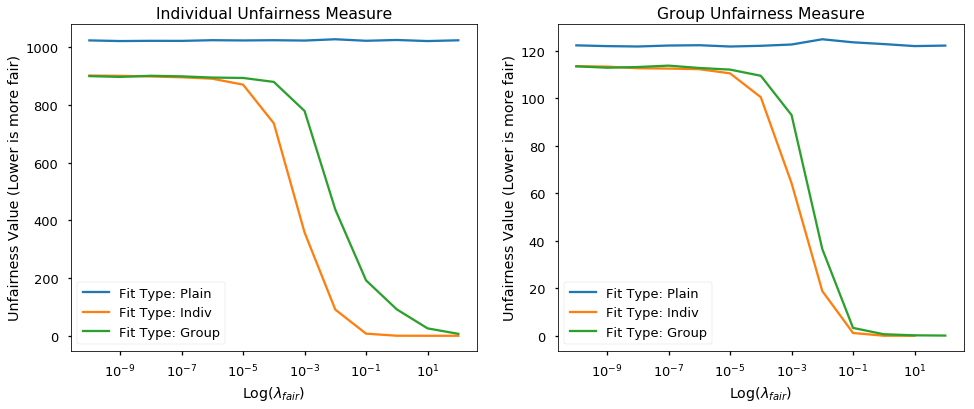

In [290]:
sns.set_context('talk')

fig = plt.figure(figsize=(16, 6))
ax_i = fig.add_subplot(121)
ax_g = fig.add_subplot(122)
# ax_p = fig.add_subplot(133)

df_p = mean_df[mean_df['Type'] == 'Plain']
df_i = mean_df[mean_df['Type'] == 'Individual']
df_g = mean_df[mean_df['Type'] == 'Group']

ax_i.set_title('Individual Unfairness Measure')
ax_i.set_xlabel('Log($\lambda_{fair}$)')
ax_i.set_ylabel('Unfairness Value (Lower is more fair)')

ax_g.set_title('Group Unfairness Measure')
ax_g.set_xlabel('Log($\lambda_{fair}$)')
ax_g.set_ylabel('Unfairness Value (Lower is more fair)')

ax_i.semilogx(df_p['l_fair'], df_p['Individual Penalty'], label='Fit Type: Plain')
ax_i.semilogx(df_i['l_fair'], df_i['Individual Penalty'], label='Fit Type: Indiv')
ax_i.semilogx(df_g['l_fair'], df_g['Individual Penalty'], label='Fit Type: Group')
ax_i.legend()

ax_g.semilogx(df_p['l_fair'], df_p['Group Penalty'], label='Fit Type: Plain')
ax_g.semilogx(df_i['l_fair'][:-1], df_i['Group Penalty'][:-1], label='Fit Type: Indiv')
# ax_g.semilogx(df_i['l_fair'], df_i['Group Penalty'], label='Fit Type: Indiv')
ax_g.semilogx(df_g['l_fair'], df_g['Group Penalty'], label='Fit Type: Group')
ax_g.legend()

fig.savefig('indiv_group_unfairness.pdf')

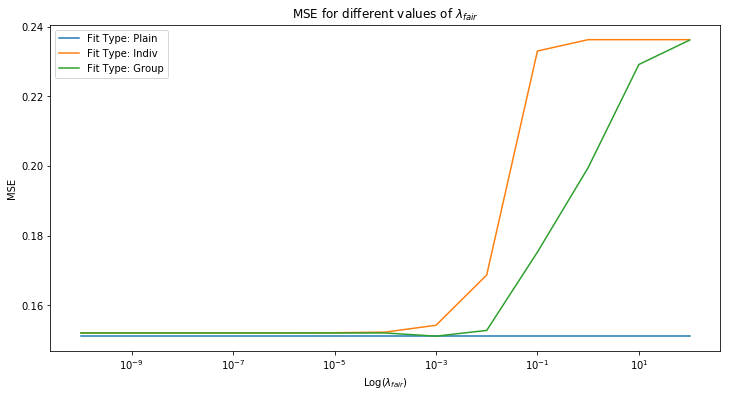

In [114]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

df_p = mean_df[mean_df['Type'] == 'Plain']
df_i = mean_df[mean_df['Type'] == 'Individual']
df_g = mean_df[mean_df['Type'] == 'Group']

ax.set_title('MSE for different values of $\lambda_{fair}$')
ax.set_xlabel('Log($\lambda_{fair}$)')
ax.set_ylabel('MSE')

ax.semilogx(df_p['l_fair'], df_p['MSE'], label='Fit Type: Plain')
ax.semilogx(df_i['l_fair'], df_i['MSE'], label='Fit Type: Indiv')
ax.semilogx(df_g['l_fair'], df_g['MSE'], label='Fit Type: Group')
ax.legend()

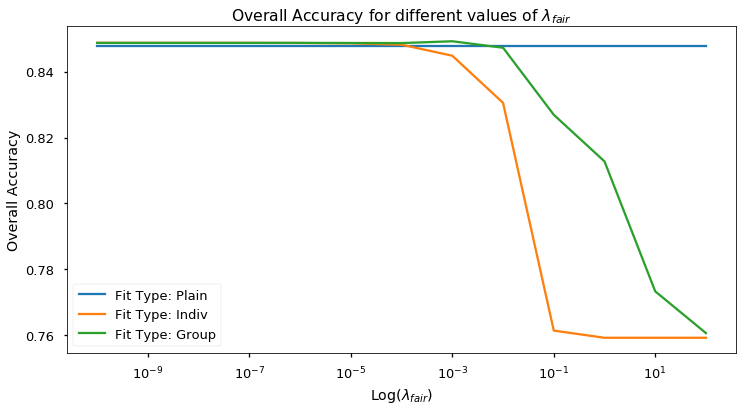

In [291]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

df_p = mean_df[mean_df['Type'] == 'Plain']
df_i = mean_df[mean_df['Type'] == 'Individual']
df_g = mean_df[mean_df['Type'] == 'Group']

ax.set_title('Overall Accuracy for different values of $\lambda_{fair}$')
ax.set_xlabel('Log($\lambda_{fair}$)')
ax.set_ylabel('Overall Accuracy')

ax.semilogx(df_p['l_fair'], df_p['Score'], label='Fit Type: Plain')
ax.semilogx(df_i['l_fair'], df_i['Score'], label='Fit Type: Indiv')
ax.semilogx(df_g['l_fair'], df_g['Score'], label='Fit Type: Group')
ax.legend()

fig.savefig('oa_vs_lfair.pdf')

In [210]:
# Open the prediction csv file
import sys
sys.path.append('../fair_regression')

import pandas as pd

pred_df = pd.read_csv('../fair_regression/test_predictions.csv')
pred_df.columns

Index(['Unnamed: 0', 'Age', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Workclass_Non-Private', 'Race_Non-White',
       'Marital_status_Divorced', 'Marital_status_Married-AF-spouse',
       'Marital_status_Married-spouse-absent', 'Marital_status_Never-married',
       'Marital_status_Separated', 'Marital_status_Widowed',
       'Occupation_Adm-clerical', 'Occupation_Armed-Forces',
       'Occupation_Craft-repair', 'Occupation_Exec-managerial',
       'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners',
       'Occupation_Machine-op-inspct', 'Occupation_Other-service',
       'Occupation_Priv-house-serv', 'Occupation_Protective-serv',
       'Occupation_Sales', 'Occupation_Tech-support',
       'Occupation_Transport-moving', 'Sex_Female', 'Country_Non-US', 'True Y',
       'fold: 1 pen: 0.001 type: plain', 'fold: 1 pen: 0.01 type: plain',
       'fold: 1 pen: 0.1 type: plain', 'fold: 1 pen: 0.001 type: indiv',
       'fold: 1 pen: 0.01 type: indi

In [211]:
pred_df = pd.read_csv('../fair_regression/test_predictions.csv')

edu_vals = pred_df['Education-Num'].unique()
edu_vals.sort()
education_map = {edu_vals[i]: i+1 for i in range(16)}

pred_df['Education-Num'] = pred_df['Education-Num'].map(education_map)

prediction_map = {0: '<= $50k', 1: '> $50k'}
gender_map = {0: 'Male', 1: 'Female'}

uniques = ['True Y', 'fold: 1 pen: 0.001 type: plain', 'fold: 1 pen: 0.01 type: plain',
       'fold: 1 pen: 0.1 type: plain', 'fold: 1 pen: 0.001 type: indiv',
       'fold: 1 pen: 0.01 type: indiv', 'fold: 1 pen: 0.1 type: indiv',
       'fold: 1 pen: 0.001 type: group', 'fold: 1 pen: 0.01 type: group',
       'fold: 1 pen: 0.1 type: group']

for u in uniques:
    pred_df[u] = pred_df[u].map(prediction_map)
pred_df['Sex_Female'] = pred_df['Sex_Female'].map(gender_map)
    

del pred_df['fold: 1 pen: 0.01 type: plain']
del pred_df['fold: 1 pen: 0.1 type: plain']

renaming_dict = {'fold: 1 pen: 0.001 type: plain': 'Plain Prediction',
                 'fold: 1 pen: 0.001 type: indiv': 'Indiv 1e-3',
                 'fold: 1 pen: 0.01 type: indiv': 'Indiv 1e-2',
                 'fold: 1 pen: 0.1 type: indiv': 'Indiv 1e-1',
                 'fold: 1 pen: 0.001 type: group': 'Group 1e-3',
                 'fold: 1 pen: 0.01 type: group': 'Group 1e-2',
                 'fold: 1 pen: 0.1 type: group': 'Group 1e-1'}
pred_df = pred_df.rename(columns=renaming_dict)

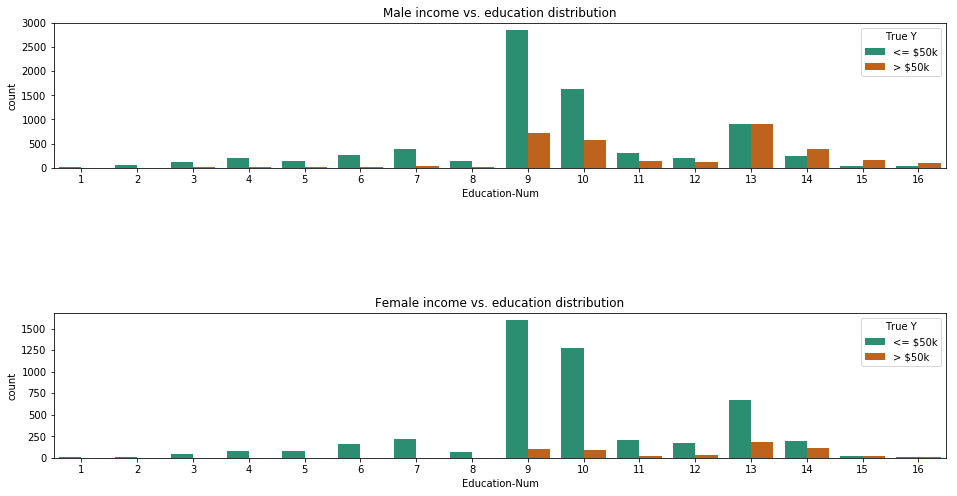

In [212]:
# Anticipating gender/race bias in the data
# Overall bias w.r.t. gender (TODO: race)
# fig = plt.figure()
# sns.countplot(x = "Sex_Female", hue = "True Y", data = pred_df, palette = "Blues_d")

# Gender-education bias w.r.t. income
male_data = pred_df[pred_df["Sex_Female"] == 'Male']
female_data = pred_df[pred_df["Sex_Female"] == 'Female']

fig = plt.figure(figsize=(16, 8))
# Male plot
fig.add_subplot(2, 1, 1)
sns.countplot(x = "Education-Num", hue = "True Y", data = male_data, palette="Dark2")
plt.title("Male income vs. education distribution")
# Female plot
fig.add_subplot(2, 1, 2)
sns.countplot(x = "Education-Num", hue = "True Y", data = female_data, palette="Dark2")
plt.title("Female income vs. education distribution")

plt.subplots_adjust(hspace = 1)

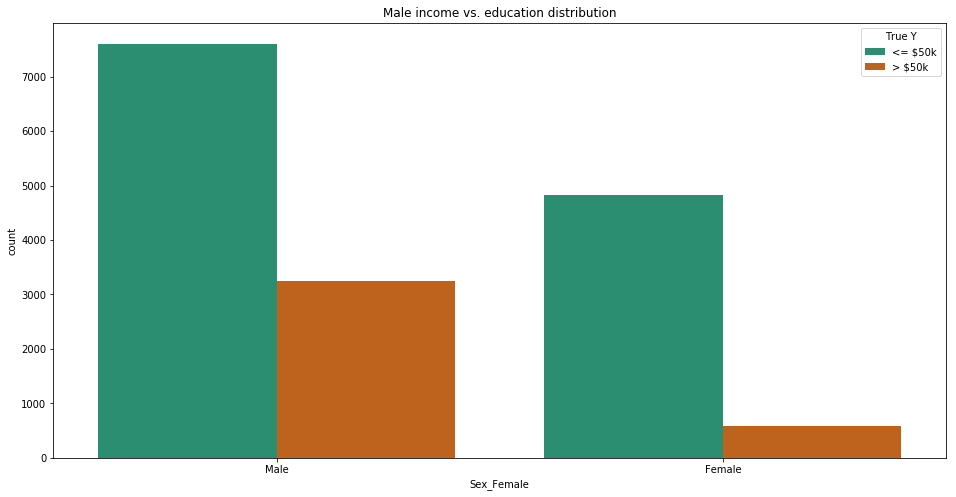

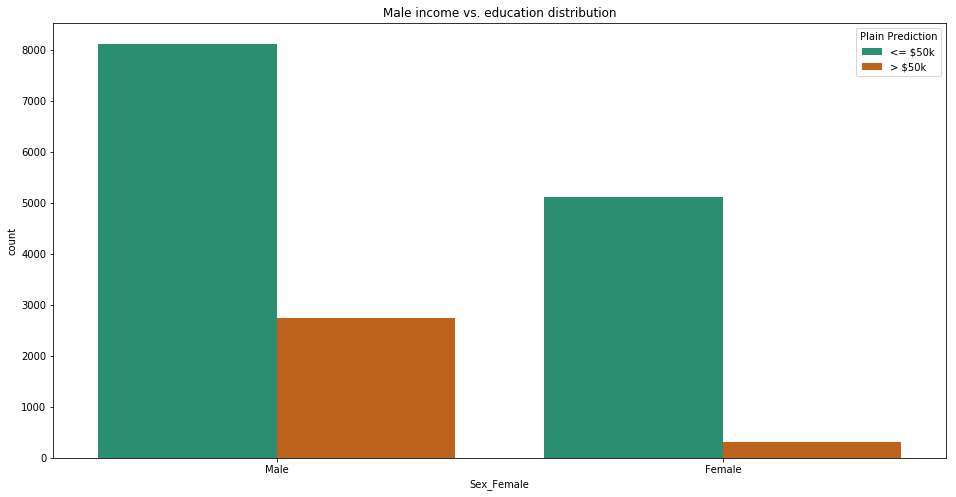

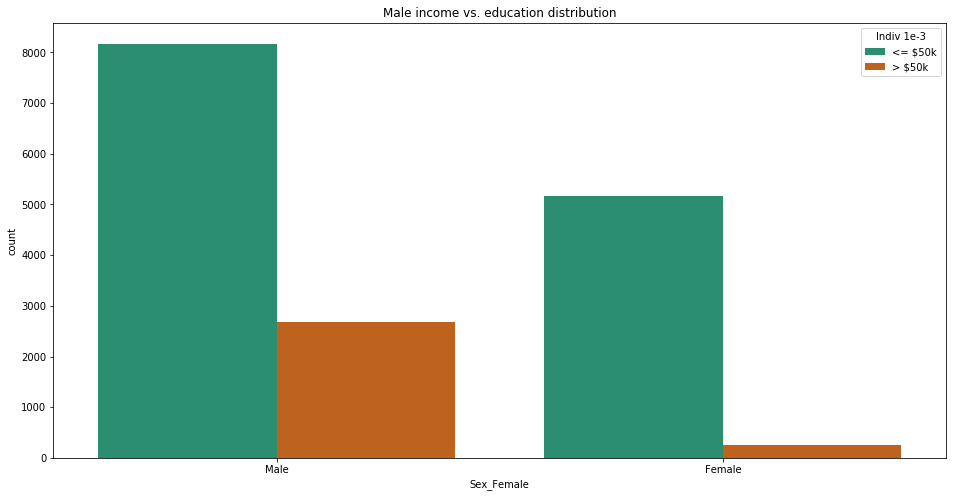

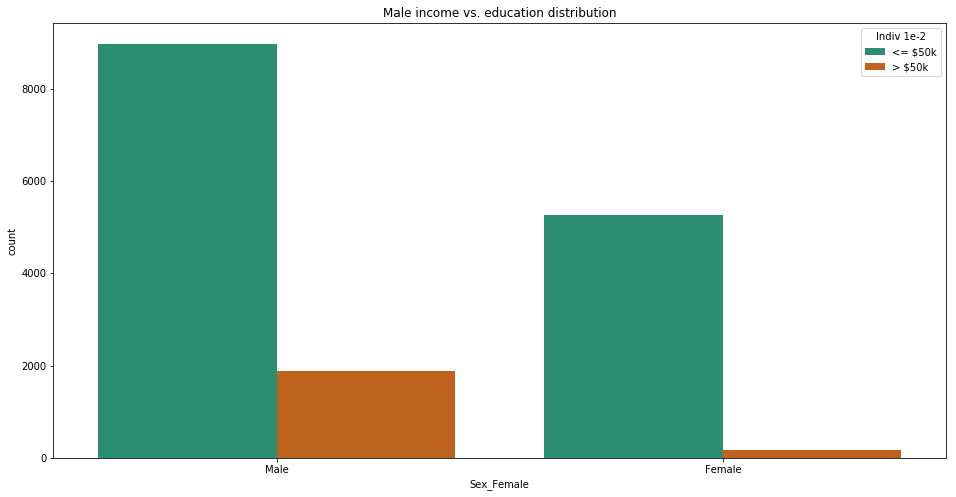

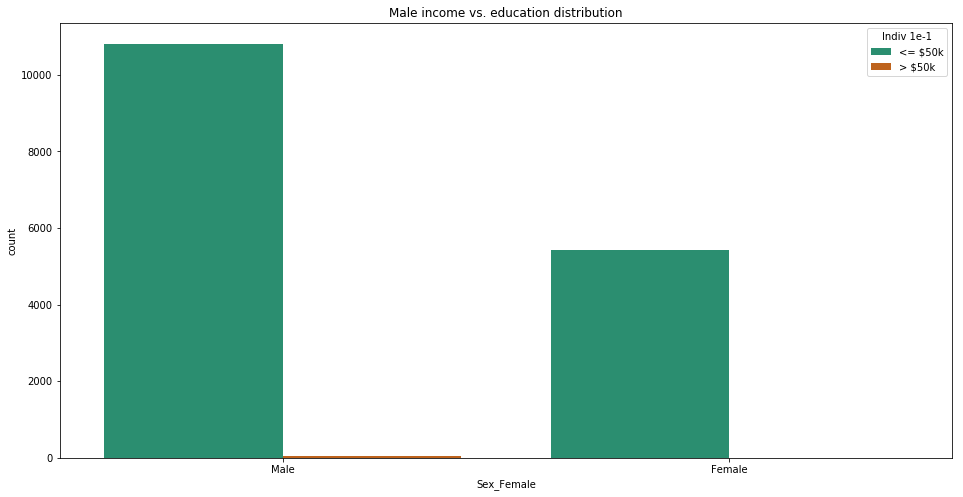

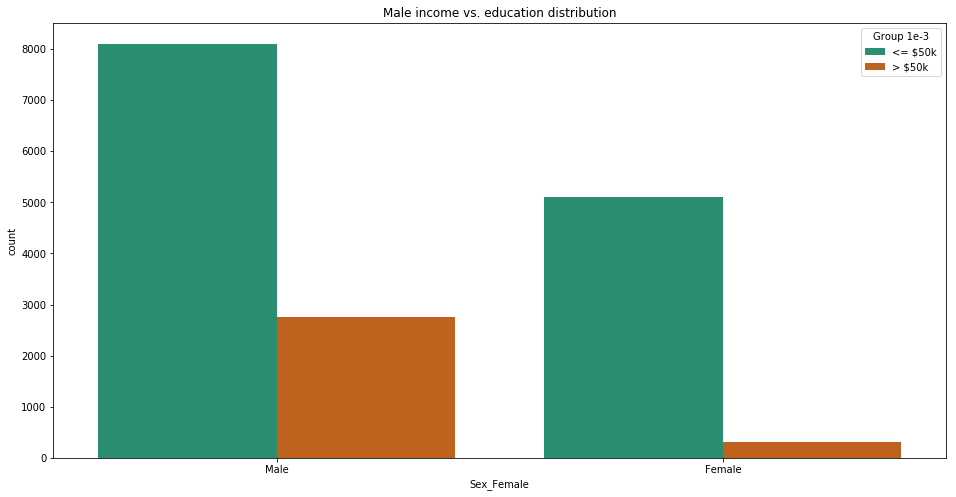

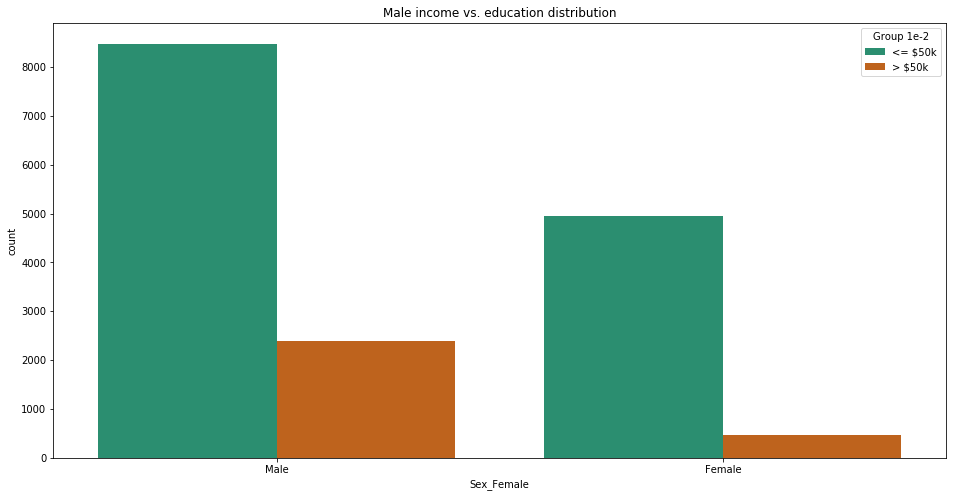

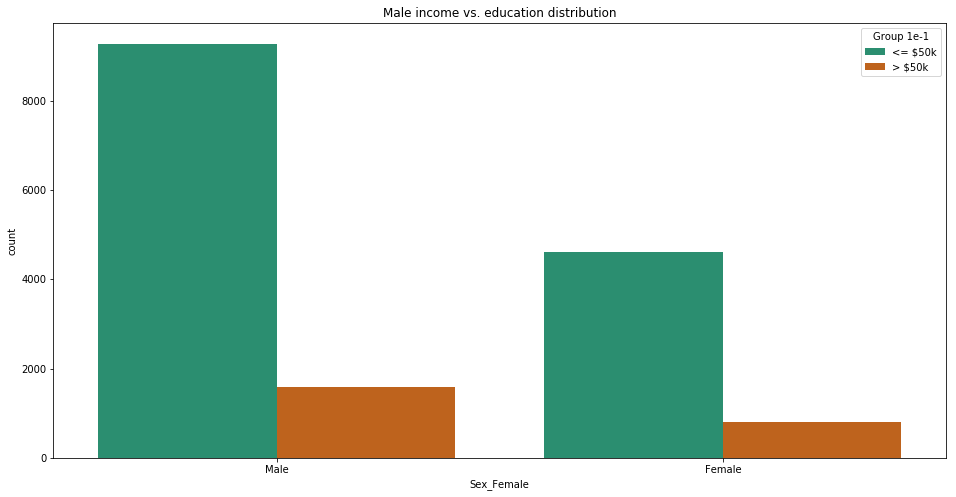

In [213]:
uniques = ['True Y', 'Plain Prediction', 'Indiv 1e-3', 'Indiv 1e-2', 'Indiv 1e-1', 'Group 1e-3', 'Group 1e-2', 'Group 1e-1']

for unid in uniques:
    fig = plt.figure(figsize=(16, 8))
    # Sexes plot
    fig.add_subplot(111)
    sns.countplot(x = "Sex_Female", hue=unid, data=pred_df, palette="Dark2")
    plt.title("Male income vs. education distribution")

In [297]:
ratio_df = pd.DataFrame()
for unid in uniques:
    d = {}
#     edu_df = pred_df.groupby(['Education-Num', 'Sex_Female', unid], as_index=False).count()
    pred_df['Counts'] = 1
    all_df = pred_df.groupby(['Sex_Female', unid], as_index=False).count()
    
#     educations = edu_df['Education-Num'].unique()
    genders = all_df['Sex_Female'].unique()
    monies = all_df[unid].unique()
    
    all_df['Low Income/High Income'] = 0.0
#     edu_df['Low Income/High Income'] = 0
    is_female = all_df['Sex_Female'] == 'Female'
    is_lo_income = all_df[unid] == '<= $50k'
    
    fem_lo = float(all_df[is_female&is_lo_income]['Counts'])
    fem_hi = float(all_df[is_female&~is_lo_income]['Counts'])
    male_lo = float(all_df[~is_female&is_lo_income]['Counts'])
    male_hi = float(all_df[~is_female&~is_lo_income]['Counts'])
    all_ratio_female = fem_lo / (fem_lo + fem_hi)
    all_ratio_male = male_lo / (male_lo + male_hi)
    d['Classifier'] = unid
    d['Percent Low Income'] = [all_ratio_female, all_ratio_male]
    d['Gender'] = ['Female', 'Male']
    
    ratio_df = pd.concat([ratio_df, pd.DataFrame.from_dict(d)])

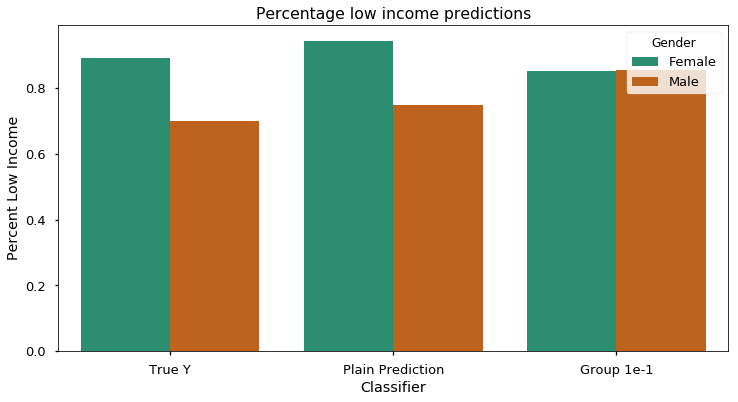

In [299]:
sns.set_context('talk')
is_unid = (ratio_df['Classifier'] == 'True Y') | (ratio_df['Classifier'] == 'Plain Prediction') | (ratio_df['Classifier'] == 'Group 1e-1')
fig = plt.figure(figsize=(12, 6))
# Sexes plot
fig.add_subplot(111)
sns.barplot(x ="Classifier", y='Percent Low Income', hue='Gender', data=ratio_df[is_unid], palette="Dark2")
plt.title('Percentage low income predictions')
fig.savefig('inequality_barplot2.pdf')

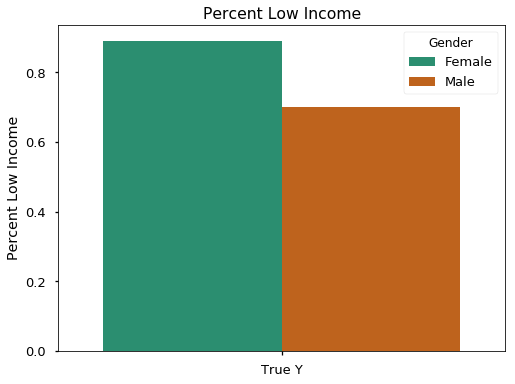

In [300]:
sns.set_context('talk')
is_unid = ratio_df['Classifier'] == 'True Y'
fig = plt.figure(figsize=(8, 6))
# Sexes plot
fig.add_subplot(111)
sns.barplot(x ="Classifier", y='Percent Low Income', hue='Gender', data=ratio_df[is_unid], palette="Dark2")
plt.xlabel('')
plt.title('Percent Low Income')
fig.savefig('pure_inequality_barplot2.pdf')

In [309]:
ratio_df = pd.DataFrame()
for unid in uniques:
    d = {}
    pred_df['Counts'] = 1
    edu_df = pred_df.groupby(['Education-Num', 'Sex_Female', unid], as_index=False).count()
    
    educations = edu_df['Education-Num'].unique()
    monies = edu_df[unid].unique()
    
    is_fem = edu_df['Sex_Female'] == 'Female'
    is_lo = edu_df[unid] == '<= $50k'
    is_edu = lambda e: edu_df['Education-Num'] == e
    
    for e in educations:
        try:
            fem_e_lo = float(edu_df[is_fem&is_lo&is_edu(e)]['Counts'].values[0])
        except(IndexError):
            fem_e_lo = 0.0
        try:
            fem_e_hi = float(edu_df[is_fem&~is_lo&is_edu(e)]['Counts'].values[0])
        except(IndexError):
            fem_e_hi = 0.0
        try:
            male_e_lo = float(edu_df[~is_fem&is_lo&is_edu(e)]['Counts'].values[0])
        except(IndexError):
            male_e_lo = 0.0
        try:
            male_e_hi = float(edu_df[~is_fem&~is_lo&is_edu(e)]['Counts'].values[0])
        except(IndexError):
            male_e_hi = 0.0

        ratio_female = float(fem_e_lo) / float(fem_e_hi + fem_e_lo)
        ratio_male = float(male_e_lo) / float(male_e_hi + male_e_lo)

        d['Classifier'] = unid
        d['Percent Low Income'] = [ratio_female, ratio_male]
        d['Gender'] = ['Female', 'Male']
        d['Education-Num'] = e
    
        ratio_df = pd.concat([ratio_df, pd.DataFrame.from_dict(d)])

In [273]:
ratio_df.head(4)

,Classifier,Education-Num,Gender,Low/High Ratio
0,True Y,1,Female,8.0
1,True Y,1,Male,23.0
0,True Y,2,Female,15.0
1,True Y,2,Male,31.0


In [312]:
is_unid = (ratio_df['Classifier'] == 'True Y') | (ratio_df['Classifier'] == 'Plain Prediction') | (ratio_df['Classifier'] == 'Group 1e-1')
working_df = ratio_df[is_unid]

In [314]:
working_df.head(5)

,Classifier,Education-Num,Gender,Percent Low Income
0,True Y,1,Female,1.000000
1,True Y,1,Male,0.958333
0,True Y,2,Female,1.000000
1,True Y,2,Male,0.968750
0,True Y,3,Female,0.953488


In [319]:
def make_desc(row):
    s1 = row['Classifier']
    s2 = row['Gender']
    
    return '{}: {}'.format(s2, s1)

working_df['Description'] = working_df.apply(make_desc, axis=1)
working_df.head(5)

,Classifier,Education-Num,Gender,Percent Low Income,Description
0,True Y,1,Female,1.000000,Female: True Y
1,True Y,1,Male,0.958333,Male: True Y
0,True Y,2,Female,1.000000,Female: True Y
1,True Y,2,Male,0.968750,Male: True Y
0,True Y,3,Female,0.953488,Female: True Y


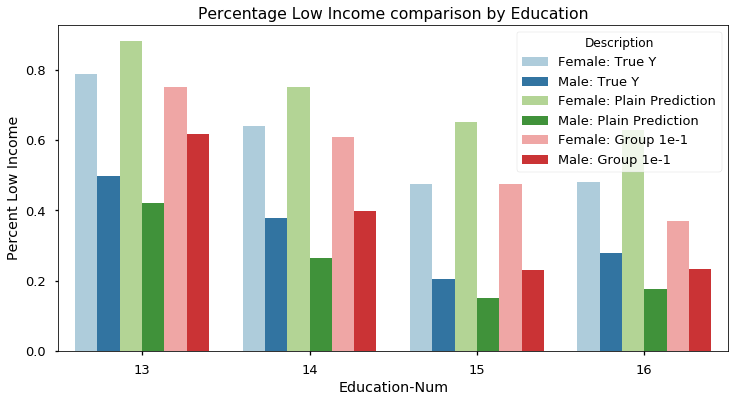

In [322]:
sns.set_context('talk')
fig = plt.figure(figsize=(12, 6))
is_edu = working_df['Education-Num'] > 12

sns.barplot(x ="Education-Num", y='Percent Low Income', hue='Description', data=working_df[is_edu], palette="Paired")
plt.title('Percentage Low Income comparison by Education')
fig.savefig('education_ineq2.pdf')

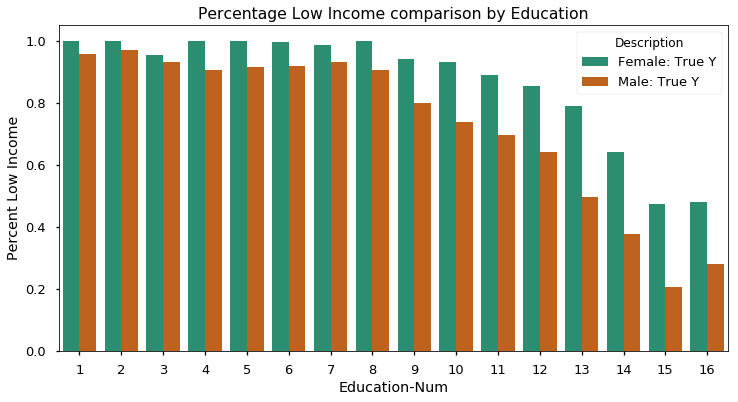

In [323]:
sns.set_context('talk')
fig = plt.figure(figsize=(12, 6))
is_edu = working_df['Classifier'] == 'True Y'

sns.barplot(x ="Education-Num", y='Percent Low Income', hue='Description', data=working_df[is_edu], palette="Dark2")
plt.title('Percentage Low Income comparison by Education')
fig.savefig('pure_education_ineq2.pdf')